In [2]:
import dendropy 
import click as c

filepath = "../datasets/ePK.ph"

tree = dendropy.Tree.get(
            path=filepath, 
            schema="newick",
    )

# Distance matrix 
pdm = tree.phylogenetic_distance_matrix()


In [3]:
import csv
from typing import Dict

def get_kinase_name_map(
    filepath: str, 
    from_name: str, # Which column name to use as the map input

) -> Dict[str, Dict[str, str]]:

    d = {}
    with open(filepath) as f:
        tsv_file = csv.DictReader(f, delimiter="\t")

        for line in tsv_file:

            new_line = {
                key.strip(): value.strip() for key, value in line.items()
            }
            
            idx = new_line[from_name]
            #print(idx)
            d[idx] = new_line
    
    return d



filepath = "../datasets/kinase_table.txt"
from_name = "Manning Name"


name_map: dict = get_kinase_name_map(filepath, from_name=from_name)

a = name_map["ZAK"]["UniprotID"]
print(a)

Q9NYL2


In [4]:
labels = tree.taxon_namespace.labels()

names = [label.split()[-1] for label in labels] # all last name labels in the tree

name_map.keys() # all kinhub manning names

diff = set(names).difference(name_map.keys())


print(list(diff))


#print(names)

[]


In [30]:




# Go through distinct pairs, and create distance matrix
matrix = {}

# Set empty dicts for the first index 
labels = tree.taxon_namespace.labels()
uniprot_names = [name_map[label.split()[-1]]["UniprotID"] for label in labels] # all last name labels in the tree, as Uniprot IDs

for a in uniprot_names:
    # Initialise
    matrix[a] = {}

    # Self-distance is zero
    matrix[a][a] = 0


count = 0
for (t1, t2) in pdm.distinct_taxon_pair_iter():

    count += 1

    # Get distance val
    distance = pdm.distance(t1, t2)

    # Get last word in label, which will be kinase's Manning Name
    x, y = t1.label.split()[-1], t2.label.split()[-1] 

    # Convert to Uniprot acc ID
    x_uniprot = name_map[x]["UniprotID"]
    y_uniprot = name_map[y]["UniprotID"]

    # Save 2nd dict that stores the distance
    try:
        matrix[x_uniprot][y_uniprot] = distance
        # Save other way round 
        matrix[y_uniprot][x_uniprot] = distance
    except:
        raise Exception(f"Something went wrong with initialising first matrix")


def kin_pair_dist(
    k1: str, 
    k2: str,
) -> float:
    if k1 in matrix and k2 in matrix:
        return matrix[k1][k2]
    
    return None

In [46]:
#kin_pair_dist("P30530", "Q13315")


# Calculate average dist of every kinase that's in the tree (note, some kinases are in kinase_table but not tree)
avg_dist = {}
for acc in uniprot_names:
    avg = sum(matrix[acc].values()) / len(matrix[acc])
    avg_dist[acc] = avg

lists = sorted(avg_dist.items(), key=lambda item: item[1], reverse=True) # list of tuples, sorted by dict's value

x, y = zip(*lists)


In [49]:
%matplotlib inline

import matplotlib.pyplot as plt


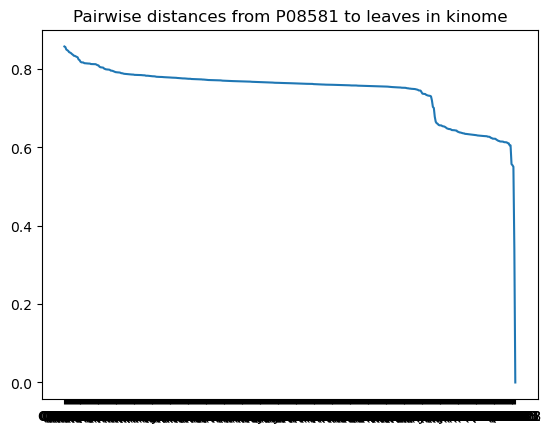

In [55]:
acc_id = "P51957"

kin_pairs = matrix[acc_id]

lists = sorted(kin_pairs.items(), key=lambda item: item[1], reverse=True) # list of tuples, sorted by dict's value
x, y = zip(*lists)

plt.plot(x, y)
plt.title(f"Pairwise distances from {acc_id} to leaves in kinome")
plt.show()

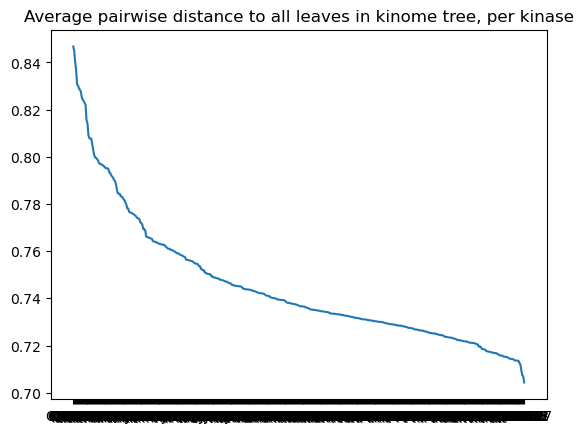

In [48]:


# Calculate average dist of every kinase that's in the tree (note, some kinases are in kinase_table but not tree)
avg_dist = {}
for acc in uniprot_names:
    avg = sum(matrix[acc].values()) / len(matrix[acc])
    avg_dist[acc] = avg

lists = sorted(avg_dist.items(), key=lambda item: item[1], reverse=True) # list of tuples, sorted by dict's value

x, y = zip(*lists)

plt.plot(x, y)
plt.title("Average pairwise distance to all leaves in kinome tree, per kinase")
plt.show()


